<a href="https://colab.research.google.com/github/rajat10-01/deep_learning/blob/master/basic_image_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 43kB/s 
     |████████████████████████████████| 501kB 44.9MB/s 
     |████████████████████████████████| 3.1MB 48.1MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.0.0-beta1


In [6]:
# import fashion mnist dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# allocate class names to all items
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

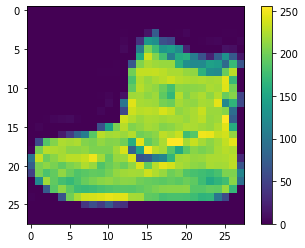

In [14]:
# lets plot an image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# normalize the images for easy processing
train_images = train_images/ 255.0
test_images = test_images/ 255.0

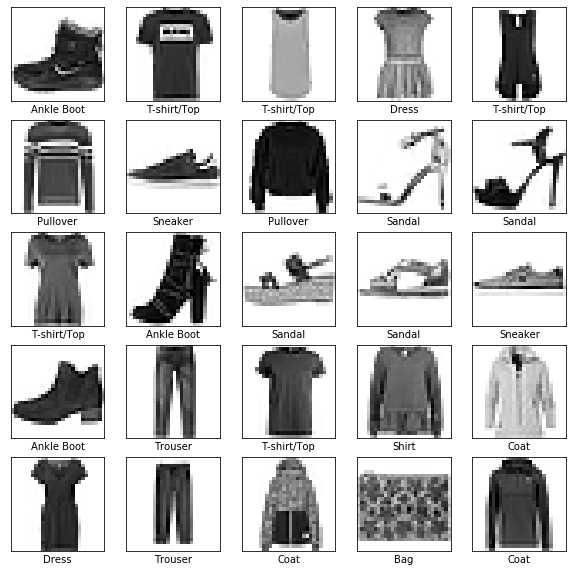

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# we prepare a model sequence with 3 layers
model = keras.Sequential([
            keras.layers.Flatten(input_shape = (28, 28)),
            keras.layers.Dense(128, activation='relu'), 
            keras.layers.Dense(10, activation='softmax')             
])

In [0]:
# compile the model with appropriate optimizer, loss and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4977 - accuracy: 0.8262
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3749 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3373 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3114 - accuracy: 0.8857
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2946 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2798 - accuracy: 0.8954
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2701 - accuracy: 0.8993
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2566 - accuracy: 0.9042
Epoch 9/10
60000/60000 [===

In [25]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("\ntest accuracy:" , test_accuracy)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3341 - accuracy: 0.8839

test accuracy: 0.8839


In [0]:
predictions = model.predict(test_images)

In [27]:
predictions[0]

array([7.25353084e-06, 1.55711299e-09, 6.79678092e-09, 1.02357387e-06,
       2.65654663e-08, 5.53304562e-03, 1.01997675e-05, 5.97188389e-03,
       2.00087979e-05, 9.88456488e-01], dtype=float32)

In [28]:
# lets see what it predicted
np.argmax(predictions[0])

9

In [29]:
# now compare with the actual value
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

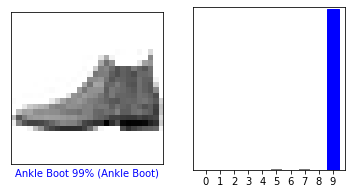

In [40]:
# verifying predictions on an example
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

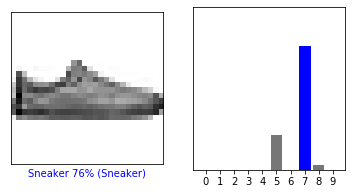

In [41]:
# lets see one more example
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

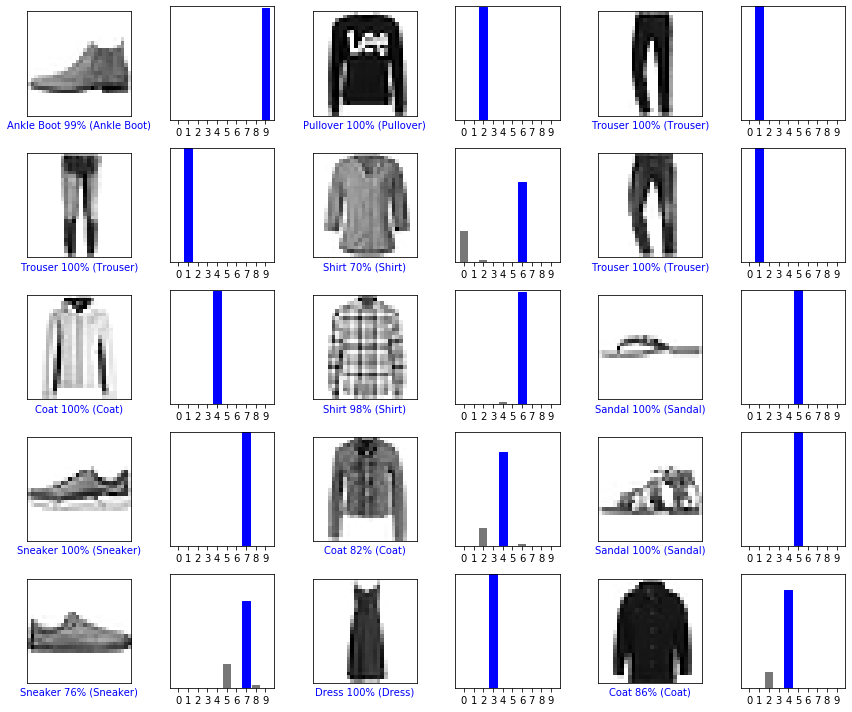

In [42]:
# plot the first X test images, their predicted labels, and the true labels.
# colour correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [43]:
# to predict only one image
img = test_images[1]
print(img.shape)

(28, 28)


In [44]:
# add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [46]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.2832841e-05 9.9890070e-15 9.9902213e-01 1.3655486e-07 2.7250900e-04
  1.6980541e-13 6.9237431e-04 3.0166342e-18 5.6459113e-09 4.1915925e-15]]


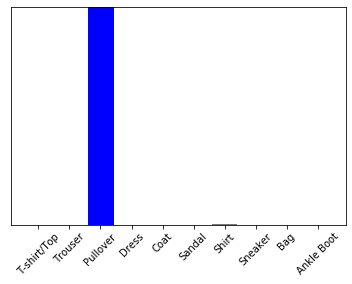

In [47]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(predictions_single[0])

2